In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import more_itertools

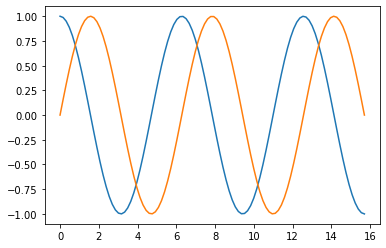

In [2]:
X = np.linspace(0, 5*np.pi, 100, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

In [3]:
m_cos = list(more_itertools.windowed(C,10))
m_cos

[(1.0,
  0.9874388886763943,
  0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512),
 (0.9874388886763943,
  0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807),
 (0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807,
  -0.1736481776669303),
 (0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807,
  -0.1736481776669303,
  -0.32706796331742166),
 (0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,

In [4]:
# m_cos = C.reshape((10,10))
m_cos = pd.DataFrame(m_cos, columns=['t9', 't8', 't7', 't6', 't5', 't4', 't3', 't2', 't1', 't0'])
m_cos

,t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068,-0.472271
...,...,...,...,...,...,...,...,...,...,...
86,0.472271,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270
87,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835
88,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071
89,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071,-0.987439


<AxesSubplot:>

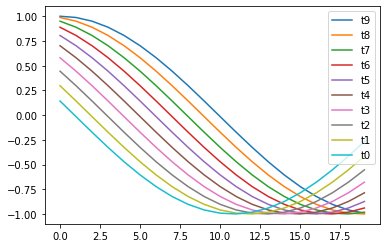

In [5]:
#as primeiras 20 linhas
m_cos[:20].plot()

<AxesSubplot:>

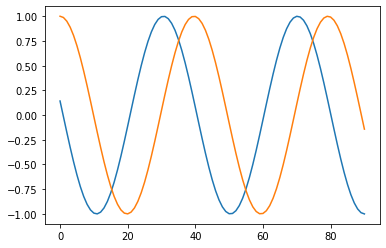

In [6]:
#plot da última coluna
m_cos['t0'].plot() 

m_cos['t9'].plot() # --> tempo anterior ao t0 (defasado)


## Podemos observar acima a defasagem da função em relação ao intervalo anterior


Fica assim, então, construída a matriz defasada das posições, para em seguida alimentar a rede neural com valor de t9 a t1, para em seguida prever o t0

In [7]:
#maneira errada de construcao dos frames sem a defasagem

# m_cos = C.reshape((10,10))
# m_cos = pd.DataFrame(m_cos, columns=['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9'])
# m_cos

## Fornecer os valores de t1 a t9, para prever o t0

Definindo as variáveis de treino do modelo:

In [8]:
X = m_cos.drop('t0', axis=1)
X.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068


In [9]:
X.shape

(91, 9)

Definindo as variáveis de teste:

In [10]:
y = m_cos.t0
y.head()

0    0.142315
1   -0.015866
2   -0.173648
3   -0.327068
4   -0.472271
Name: t0, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

2021-08-10 23:10:49.138486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-10 23:10:49.138512: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

2021-08-10 23:10:51.363714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-10 23:10:51.363766: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-10 23:10:51.363797: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gabriel-gabriel): /proc/driver/nvidia/version does not exist
2021-08-10 23:10:51.364151: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [34]:
# fit model
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 0.2967
Epoch 2/100
2/2 - 0s - loss: 0.2775
Epoch 3/100
2/2 - 0s - loss: 0.2576
Epoch 4/100
2/2 - 0s - loss: 0.2383
Epoch 5/100
2/2 - 0s - loss: 0.2193
Epoch 6/100
2/2 - 0s - loss: 0.1997
Epoch 7/100
2/2 - 0s - loss: 0.1801
Epoch 8/100
2/2 - 0s - loss: 0.1616
Epoch 9/100
2/2 - 0s - loss: 0.1475
Epoch 10/100
2/2 - 0s - loss: 0.1385
Epoch 11/100
2/2 - 0s - loss: 0.1345
Epoch 12/100
2/2 - 0s - loss: 0.1300
Epoch 13/100
2/2 - 0s - loss: 0.1264
Epoch 14/100
2/2 - 0s - loss: 0.1223
Epoch 15/100
2/2 - 0s - loss: 0.1167
Epoch 16/100
2/2 - 0s - loss: 0.1107
Epoch 17/100
2/2 - 0s - loss: 0.1041
Epoch 18/100
2/2 - 0s - loss: 0.0990
Epoch 19/100
2/2 - 0s - loss: 0.0936
Epoch 20/100
2/2 - 0s - loss: 0.0895
Epoch 21/100
2/2 - 0s - loss: 0.0841
Epoch 22/100
2/2 - 0s - loss: 0.0791
Epoch 23/100
2/2 - 0s - loss: 0.0743
Epoch 24/100
2/2 - 0s - loss: 0.0690
Epoch 25/100
2/2 - 0s - loss: 0.0637
Epoch 26/100
2/2 - 0s - loss: 0.0588
Epoch 27/100
2/2 - 0s - loss: 0.0537
Epoch 28/1

In [35]:
X_test.shape

(31, 9)

In [36]:
type(X_test)

pandas.core.frame.DataFrame

In [37]:
# demonstrate prediction
# x_input = np.array([0.987439, 0.950071,	0.888835, 0.805270, 0.701475, 0.580057, 0.444067, 0.296920, 0.82129])
# x_input = x_input.reshape((1, 9))
yhat = model.predict(X_test, verbose=2)

1/1 - 0s


In [38]:
yhat

array([[ 0.08468458],
       [ 0.20857583],
       [-0.73220825],
       [-0.9423676 ],
       [ 0.15135622],
       [ 0.75629026],
       [ 0.25130317],
       [ 0.7921194 ],
       [-0.9825464 ],
       [-0.5195226 ],
       [-0.71364146],
       [ 0.7678044 ],
       [ 0.99078935],
       [ 0.27192795],
       [-0.96918255],
       [-0.4608972 ],
       [-0.40406913],
       [ 0.9119031 ],
       [-0.9679459 ],
       [ 0.547424  ],
       [-0.77283525],
       [ 0.87854487],
       [ 0.4965664 ],
       [ 0.98323154],
       [ 0.9276546 ],
       [-0.98752195],
       [ 0.69307745],
       [ 0.93206865],
       [ 0.99735487],
       [ 0.61727923],
       [-0.9533363 ]], dtype=float32)

In [39]:
y_test

40    0.079250
22    0.204807
55   -0.745264
88   -0.950071
0     0.142315
26    0.745264
39    0.235759
66    0.786053
10   -0.991955
44   -0.527225
85   -0.701475
35    0.766044
70    0.999497
62    0.266474
12   -0.981929
4    -0.472271
18   -0.415415
28    0.916108
49   -0.975430
64    0.553920
15   -0.786053
67    0.873849
77    0.472271
30    0.995472
33    0.928368
11   -0.999497
65    0.678509
68    0.939693
31    0.997987
76    0.605610
9    -0.959493
Name: t0, dtype: float64

In [43]:
_, train_mse = model.evaluate(X_train, y_train, verbose=2)

2/2 - 1s - loss: 0.0085


TypeError: cannot unpack non-iterable float object